<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/Project_5(AI%20Echo%20-%20Sentiment%20Analysis)/notebook/Model_training_with_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

* Packages for Text preprocessing

In [ ]:
# Packages for Data Export
import pandas as pd
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* Packages for Text cleaning

In [ ]:
# Importing packages for Text cleaning
!pip install emoji #installing emojis packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 11.0 MB/s eta 0:00:00


In [ ]:
import re #importing regular expression
import emoji #importing emojis packages

* Importing packages for Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk # Importing needed packages for tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize # importing packages for word tekenization

* Importing packages for Normalization

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.0 MB/s eta 0:00:00


In [ ]:
import contractions # Finding the root words

* Importing packages for Lemetization & Stop words

In [ ]:
nltk.download('wordnet') # Download the WordNet corpus for lemmatization
nltk.download('omw-1.4') # Download the Open Multilingual WordNet corpus for lemmatization
nltk.download('stopwords') # Download the stopwords corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer # Import the WordNetLemmatizer for lemmatization
from nltk.corpus import stopwords # Import the stopwords corpus

* Importing packages for Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Doing TF-IDF

# Exporting the data



```
Existing data not suitable for model building, So here i'm going to traning a data with new dataset from Kaggle
```



In [ ]:
# Replace the URL with your raw GitHub CSV link
url = 'https://raw.githubusercontent.com/Infant-Joshva/Data-Science-learning-path/refs/heads/main/Project_5(AI%20Echo%20-%20Sentiment%20Analysis)/dataset/New%20Dataset%20from%20Kaggle/ChatGPT_Reviews.csv'

# Load the CSV into a DataFrame
sentiment_df = pd.read_csv(url,  sep=',')

# Check the first few rows
sentiment_df.head()


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20


# Preprocessing the data

## Delete the unwanted columns

In [ ]:
sentiment_df.drop(['Review Id','Ratings','Review Date'], axis=1, inplace=True)
sentiment_df.head(10)

,Review
0,good
1,good
2,nice app
3,"nice, ig"
4,"this is a great app, the bot is so accurate to..."
5,so nice app
6,"just love this app, or guy"
7,great app
8,Very impressive
9,helps with coding a lot this ai is great for e...


### Handling null values

In [ ]:
sentiment_df.isnull().sum()

,0
Review,6


In [ ]:
sentiment_df.dropna(inplace=True)

In [ ]:
sentiment_df.isnull().sum()

,0
Review,0


### Deleting duplicate values

In [ ]:
sentiment_df.duplicated().sum()

np.int64(71230)

In [ ]:
sentiment_df.drop_duplicates(inplace=True)

In [ ]:
sentiment_df.duplicated().sum()

np.int64(0)

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125491 entries, 0 to 196726
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  125491 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


# Text cleaning - (Functions)

## Function for Text preprocessing

In [ ]:
#Function for lower case
def lowercase(text):
  return text.lower()

#remove url
def remove_urls(text):
  urls_pattern=re.compile(r'https?://\S+|www\.\S+')
  return urls_pattern.sub(r'',text)

# remove Mail
def remove_mail(text):
  mail_pattern=re.compile(r'\S+@\S+')
  return mail_pattern.sub(r'',text)

# remove HTML tags
def remove_html(text):
  html_pattern=re.compile('<.*?>')
  return html_pattern.sub(r'',text)

# remove punctuations
def remove_punctuations(text):
  punc_pattern=re.compile(r'[^\w\s]')
  return punc_pattern.sub(r'',text)

# remove numbers and number with text
def remove_numbers(text):
  text=re.sub(r'[A-Za-z]+\d+','',text)
  text=re.sub(r'\d+\s*[A-Za-z]+','',text)
  text=re.sub(r'\d+','',text)
  return text

# remove emoji
def remove_emoji(text):
  return emoji.replace_emoji(text,replace='')

# remove whitespace
def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

In [ ]:
# combining all function as a single funcation
def text_cleaning(text):
  text=lowercase(text)
  text=remove_urls(text)
  text=remove_mail(text)
  text=remove_html(text)
  text=remove_punctuations(text)
  text=remove_numbers(text)
  text=remove_emoji(text)
  text=remove_whitespace(text)
  return text

## Tokenization

In [ ]:
def tokenize(text):
  return word_tokenize(text)

## Normalization

In [ ]:
def expand_contractions(text):
  return contractions.fix(text)

## Lemetization & Stop words

In [ ]:
# Lematize and stops words

stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def lemmatizer_stopwords(text):
  return [lemmatizer.lemmatize(word) for word in text if word not in stop_words]

# Applying the written function

## Text cleaning

In [ ]:
sentiment_df.head()

,Review
0,good
2,nice app
3,"nice, ig"
4,"this is a great app, the bot is so accurate to..."
5,so nice app


In [ ]:
sentiment_df.columns

Index(['Review'], dtype='object')

In [ ]:
# def text_cleaning(text)
sentiment_df['cleaned_review'] = sentiment_df['Review'].apply(text_cleaning)
sentiment_df

,Review,cleaned_review
0,good,good
2,nice app,nice app
3,"nice, ig",nice ig
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...
5,so nice app,so nice app
...,...,...
196722,Update 2023,update
196723,its grear,its grear
196724,Funtastic App,funtastic app
196725,hi all,hi all


## Normalization

In [ ]:
sentiment_df['expanded_review'] = sentiment_df['cleaned_review'].apply(expand_contractions)
sentiment_df.head()

,Review,cleaned_review,expanded_review
0,good,good,good
2,nice app,nice app,nice app
3,"nice, ig",nice ig,nice ig
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...
5,so nice app,so nice app,so nice app


## Tokenize

In [ ]:
sentiment_df['tokenized_review'] = sentiment_df['expanded_review'].apply(tokenize)
sentiment_df.head()

,Review,cleaned_review,expanded_review,tokenized_review
0,good,good,good,[good]
2,nice app,nice app,nice app,"[nice, app]"
3,"nice, ig",nice ig,nice ig,"[nice, ig]"
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...,"[this, is, a, great, app, the, bot, is, so, ac..."
5,so nice app,so nice app,so nice app,"[so, nice, app]"


## Lemmatizer and Stopwords

In [ ]:
sentiment_df['lemmatizer_stopwords_text']=sentiment_df['tokenized_review'].apply(lemmatizer_stopwords)
sentiment_df.head()

,Review,cleaned_review,expanded_review,tokenized_review,lemmatizer_stopwords_text
0,good,good,good,[good],[good]
2,nice app,nice app,nice app,"[nice, app]","[nice, app]"
3,"nice, ig",nice ig,nice ig,"[nice, ig]","[nice, ig]"
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, give, ti..."
5,so nice app,so nice app,so nice app,"[so, nice, app]","[nice, app]"


## Final fully cleaned text

In [ ]:
sentiment_df['Final_cleaned_review'] = sentiment_df['lemmatizer_stopwords_text'].apply(lambda x: ' '.join(x))
sentiment_df.head()

,Review,cleaned_review,expanded_review,tokenized_review,lemmatizer_stopwords_text,Final_cleaned_review
0,good,good,good,[good],[good],good
2,nice app,nice app,nice app,"[nice, app]","[nice, app]",nice app
3,"nice, ig",nice ig,nice ig,"[nice, ig]","[nice, ig]",nice ig
4,"this is a great app, the bot is so accurate to...",this is a great app the bot is so accurate to ...,this is a great app the bot is so accurate to ...,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, give, ti...",great app bot accurate anything give tip gamin...
5,so nice app,so nice app,so nice app,"[so, nice, app]","[nice, app]",nice app


In [ ]:
sentiment_df.drop(columns=['Review','cleaned_review','expanded_review','tokenized_review','lemmatizer_stopwords_text'],inplace=True)
sentiment_df.head()

,Final_cleaned_review
0,good
2,nice app
3,nice ig
4,great app bot accurate anything give tip gamin...
5,nice app


# Review mapping to Positive, Neutral or Negative

## Sentiment mapping with Textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_mapping(text, threshold=0.15):
    from textblob import TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    # 1. Check for Positive sentiment
    if sentiment > threshold:
        return 'Positive'

    # 2. Check for Negative sentiment
    elif sentiment < -threshold:
        return 'Negative'

    # 3. All remaining scores (between -threshold and +threshold) are Neutral
    else:
        return 'Neutral'

In [ ]:
sentiment_df['sentiment']=sentiment_df['Final_cleaned_review'].apply(sentiment_mapping)
sentiment_df.head()

,Final_cleaned_review,sentiment
0,good,Positive
2,nice app,Positive
3,nice ig,Positive
4,great app bot accurate anything give tip gamin...,Positive
5,nice app,Positive


In [ ]:
sentiment_df['sentiment'].value_counts()

,count
sentiment,
Positive,79675
Neutral,41102
Negative,4714


In [ ]:
sentiment_df.columns

Index(['Final_cleaned_review', 'sentiment'], dtype='object')

In [ ]:
sentiment_df.isnull().sum()

,0
Final_cleaned_review,0
sentiment,0


In [ ]:
sentiment_df.dropna(inplace=True)

In [ ]:
sentiment_df.isnull().sum()

,0
Final_cleaned_review,0
sentiment,0


In [ ]:
sentiment_df.duplicated().sum()

np.int64(27211)

In [ ]:
sentiment_df.drop_duplicates(inplace=True)

In [ ]:
sentiment_df.duplicated().sum()

np.int64(0)

# Extract Languages

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=5e3b1c74a4c348beecfcd8697538aa76bc2a116e2b0e6cda6f4dc4ff496c46bb
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
from langdetect import detect, DetectorFactory

In [ ]:
# Set a seed to enforce consistent results, as langdetect can be non-deterministic
DetectorFactory.seed = 0

def get_language(text):
    try:
        return detect(str(text))
    except:
        return 'error'

In [ ]:
sentiment_df['detected_language'] = sentiment_df['Final_cleaned_review'].apply(get_language)

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98280 entries, 0 to 196726
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Final_cleaned_review  98280 non-null  object
 1   sentiment             98280 non-null  object
 2   detected_language     98280 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [ ]:
# Filter the DataFrame to keep only English reviews (ISO 639-1 code for English is 'en')
english_reviews_df = sentiment_df[sentiment_df['detected_language'] == 'en'].copy()

In [ ]:
print(f"Total reviews: {len(sentiment_df)}")
print(f"English reviews: {len(english_reviews_df)}")

Total reviews: 98280
English reviews: 67862


In [ ]:
english_reviews_df.reset_index(drop=True, inplace=True)
english_reviews_df.head()

,Final_cleaned_review,sentiment,detected_language
0,great app bot accurate anything give tip gamin...,Positive,en
1,great app,Positive,en
2,help coding lot ai great everyone,Positive,en
3,happy chatgpt answer question ask stop midway ...,Neutral,en
4,used good app keep saying error occured try su...,Positive,en


In [ ]:
english_reviews_df.to_csv('english_reviews.csv', index=False)

# Balancing the data to minority class

In [ ]:
english_reviews_df['sentiment'].value_counts()

,count
sentiment,
Positive,46541
Neutral,18067
Negative,3254


In [ ]:
english_reviews_df.columns

Index(['Final_cleaned_review', 'sentiment', 'detected_language'], dtype='object')

In [ ]:
category_counts = english_reviews_df['sentiment'].value_counts()
min_count = category_counts.min()

print(f"Counts per category:\n{category_counts}")
print(f"The minimum count is: {min_count}")

Counts per category:
sentiment
Positive    46541
Neutral     18067
Negative     3254
Name: count, dtype: int64
The minimum count is: 3254


In [ ]:
english_reviews_df['sentiment'].value_counts()

,count
sentiment,
Positive,46541
Neutral,18067
Negative,3254


In [ ]:
balanced_samples = []

for sentiment in english_reviews_df['sentiment'].unique():
    subset = english_reviews_df[english_reviews_df['sentiment'] == sentiment]
    # Randomly sample 'min_count' rows from this subset
    sampled_subset = subset.sample(n=min_count, random_state=42)

    # Add the sampled subset to the list
    balanced_samples.append(sampled_subset)

# Concatenate all the sampled subsets into one balanced DataFrame
balanced_en_senti_df = pd.concat(balanced_samples)

# Verify the new distribution
print("\nNew balanced counts:")
print(balanced_en_senti_df['sentiment'].value_counts())


New balanced counts:
sentiment
Positive    3254
Neutral     3254
Negative    3254
Name: count, dtype: int64


In [ ]:
balanced_en_senti_df.reset_index(drop=True, inplace=True)
balanced_en_senti_df

,Final_cleaned_review,sentiment,detected_language
0,super useful help study clearing doubt,Positive,en
1,super helpful needy,Positive,en
2,world changing amazing wait see future hold ap...,Positive,en
3,informable fun creative think good,Positive,en
4,thanks making mobile app far good,Positive,en
...,...,...,...
9757,careful change model decides use based request...,Negative,en
9758,recently purchased plus work app want fix mean...,Negative,en
9759,giving start ask question answer say wrong sta...,Negative,en
9760,recent update started causing problem kept tel...,Negative,en


In [ ]:
balanced_en_senti_df.value_counts('sentiment')

,count
sentiment,
Negative,3254
Neutral,3254
Positive,3254


In [ ]:
balanced_en_senti_df.columns

Index(['Final_cleaned_review', 'sentiment', 'detected_language'], dtype='object')

# Model Building

In [ ]:
balanced_en_senti_df

,Final_cleaned_review,sentiment,detected_language
0,super useful help study clearing doubt,Positive,en
1,super helpful needy,Positive,en
2,world changing amazing wait see future hold ap...,Positive,en
3,informable fun creative think good,Positive,en
4,thanks making mobile app far good,Positive,en
...,...,...,...
9757,careful change model decides use based request...,Negative,en
9758,recently purchased plus work app want fix mean...,Negative,en
9759,giving start ask question answer say wrong sta...,Negative,en
9760,recent update started causing problem kept tel...,Negative,en


In [ ]:
x=balanced_en_senti_df['Final_cleaned_review']
y=balanced_en_senti_df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7809,), (1953,), (7809,), (1953,))

## Importing packages for Model building

In [ ]:
!pip install imbalanced-learn

In [ ]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.84      0.94      0.89      2617
     Neutral       0.90      0.70      0.79      2613
    Positive       0.86      0.94      0.90      2579

    accuracy                           0.86      7809
   macro avg       0.87      0.86      0.86      7809
weighted avg       0.87      0.86      0.86      7809

              precision    recall  f1-score   support

    Negative       0.71      0.87      0.79       637
     Neutral       0.68      0.41      0.51       641
    Positive       0.74      0.87      0.80       675

    accuracy                           0.72      1953
   macro avg       0.71      0.72      0.70      1953
weighted avg       0.71      0.72      0.70      1953



> Model is overfit due to unwanted repetive words

In [ ]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

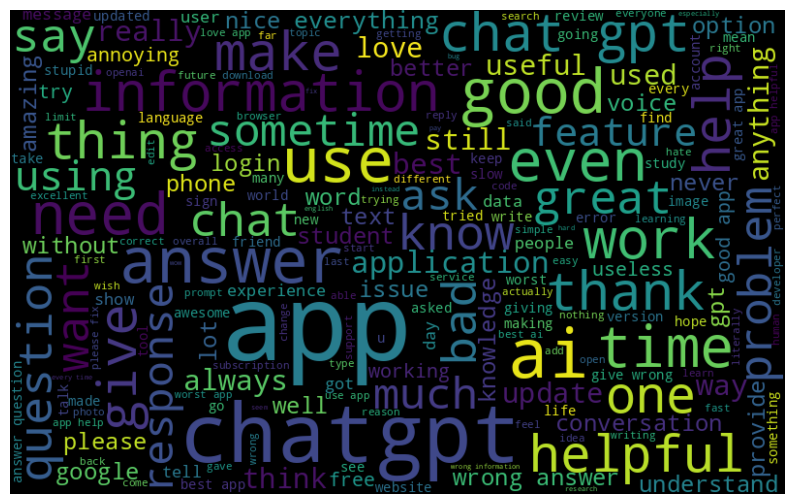

In [ ]:
all_words = ' '.join([text for text in balanced_en_senti_df['Final_cleaned_review']])
wordcolud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
freq=pd.Series(' '.join(balanced_en_senti_df['Final_cleaned_review']).split()).value_counts()
freq

,count
app,3556
chatgpt,1175
answer,1093
ai,954
like,871
...,...
tooannoying,1
mahn,1
decides,1
abhorrent,1


In [ ]:
freq.head(60)

,count
app,3556
chatgpt,1175
answer,1093
ai,954
like,871
good,852
chat,833
use,819
give,812
time,776


In [ ]:
freq.describe()

,count
count,8882.000000
mean,10.998424
std,60.640984
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,3556.000000


In [ ]:
freq_50 = freq[freq<=50]
freq_50

,count
kind,50
missing,50
date,50
based,50
enough,50
...,...
tooannoying,1
mahn,1
decides,1
abhorrent,1


In [ ]:
freq_100 = freq[freq<=100]
freq_100

,count
openai,100
learn,100
especially,99
solve,99
accurate,98
...,...
tooannoying,1
mahn,1
decides,1
abhorrent,1


In [ ]:
freq_300 = freq[freq<=300]
freq_300

,count
every,298
thank,296
always,277
application,274
amazing,271
...,...
tooannoying,1
mahn,1
decides,1
abhorrent,1


In [ ]:
freq_400 = freq[freq<=400]
freq_400

,count
voice,400
problem,393
say,384
love,377
much,376
...,...
tooannoying,1
mahn,1
decides,1
abhorrent,1


In [ ]:
freq_500 = freq[freq<=500]
freq_500

,count
thing,478
please,467
one,459
get,445
great,428
...,...
tooannoying,1
mahn,1
decides,1
abhorrent,1


In [ ]:
balanced_en_senti_df['Final_text_new']=balanced_en_senti_df['Final_cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_100]))
balanced_en_senti_df['Final_text_new']

,Final_text_new
0,useful help study
1,helpful
2,world amazing see app love much much chatgpt
3,think good
4,thanks making app good
...,...
9757,use working chat phone access chat recommend u...
9758,plus work app want fix mean access app need fix
9759,giving ask question answer say wrong say corre...
9760,update problem try even problem work


In [ ]:
balanced_en_senti_df['Final_text_new'].isnull().sum()

np.int64(0)

In [ ]:
x=balanced_en_senti_df['Final_text_new']
y=balanced_en_senti_df['sentiment']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7809,), (1953,), (7809,), (1953,))

In [ ]:
nb_pipeline_2=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline_2.fit(x_train,y_train)

y_train_pred=nb_pipeline_2.predict(x_train)
y_test_pred=nb_pipeline_2.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.66      0.71      0.69      2617
     Neutral       0.57      0.54      0.56      2613
    Positive       0.77      0.76      0.77      2579

    accuracy                           0.67      7809
   macro avg       0.67      0.67      0.67      7809
weighted avg       0.67      0.67      0.67      7809

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.67      0.69      0.68       637
     Neutral       0.55      0.52      0.54       641
    Positive       0.74      0.76      0.75       675

    accuracy                           0.66      1953
   macro avg       0.66      0.66      0.66      1953
weighted avg       0.66      0.66      0.66      1953



In [ ]:
from sklearn.model_selection import GridSearchCV

nb_pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams only vs. Unigrams and Bigrams
    'tfidf__max_features': [10000, 20000, None], # Max features limit
    'nb__alpha': [0.1, 0.5, 1.0, 5.0]  # Smoothing parameter
}

grid_search = GridSearchCV(nb_pipeline_2, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# The best model:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'nb__alpha': 5.0, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 1)}


In [ ]:
nb_pipeline_bigrams = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 1))),
    ('nb', MultinomialNB(alpha=5.0))
])

nb_pipeline_bigrams.fit(x_train,y_train)

y_train_pred=nb_pipeline_bigrams.predict(x_train)
y_test_pred=nb_pipeline_bigrams.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.66      0.71      0.69      2617
     Neutral       0.57      0.53      0.55      2613
    Positive       0.77      0.76      0.77      2579

    accuracy                           0.67      7809
   macro avg       0.67      0.67      0.67      7809
weighted avg       0.67      0.67      0.67      7809

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.67      0.69      0.68       637
     Neutral       0.55      0.51      0.53       641
    Positive       0.74      0.76      0.75       675

    accuracy                           0.66      1953
   macro avg       0.65      0.66      0.65      1953
weighted avg       0.65      0.66      0.66      1953



In [ ]:
nb_pipeline_bigrams_2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('nb', MultinomialNB(alpha=5.0))
])

nb_pipeline_bigrams_2.fit(x_train,y_train)

y_train_pred=nb_pipeline_bigrams_2.predict(x_train)
y_test_pred=nb_pipeline_bigrams_2.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.69      0.81      0.75      2617
     Neutral       0.72      0.56      0.63      2613
    Positive       0.79      0.83      0.81      2579

    accuracy                           0.73      7809
   macro avg       0.73      0.73      0.73      7809
weighted avg       0.73      0.73      0.73      7809

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.63      0.74      0.68       637
     Neutral       0.57      0.42      0.48       641
    Positive       0.73      0.79      0.76       675

    accuracy                           0.65      1953
   macro avg       0.64      0.65      0.64      1953
weighted avg       0.64      0.65      0.64      1953



In [ ]:
#SVM

from sklearn.svm import SVC

In [ ]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 1))),
    ('svm', SVC(class_weight='balanced'))
])

svm_pipeline.fit(x_train, y_train)

y_train_pred = svm_pipeline.predict(x_train)
y_test_pred = svm_pipeline.predict(x_test)

print(classification_report(y_train, y_train_pred))
print('-' * 70)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.93      0.76      0.84      2617
     Neutral       0.71      0.91      0.80      2613
    Positive       0.94      0.83      0.88      2579

    accuracy                           0.83      7809
   macro avg       0.86      0.83      0.84      7809
weighted avg       0.86      0.83      0.84      7809

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.61      0.69       637
     Neutral       0.56      0.76      0.65       641
    Positive       0.86      0.76      0.81       675

    accuracy                           0.71      1953
   macro avg       0.74      0.71      0.71      1953
weighted avg       0.74      0.71      0.72      1953



In [ ]:
import pickle

In [ ]:
pickle.dump(svm_pipeline, open('SVM1.pkl', 'wb'))

In [ ]:
# Define the custom weights dictionary
# custom_weights = {
#     'Negative': 1.5,  # Increased weight for higher penalty on misclassification
#     'Neutral': 1.0,   # Baseline weight
#     'Positive': 1.0   # Baseline weight
# }

svm_pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=7000, ngram_range=(1, 2))),
    ('svm', SVC(class_weight='balanced'))
])

svm_pipeline_2.fit(x_train, y_train)

y_train_pred = svm_pipeline_2.predict(x_train)
y_test_pred = svm_pipeline_2.predict(x_test)

print(classification_report(y_train, y_train_pred))
print('-' * 70)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      2651
     Neutral       0.93      0.99      0.96     14444
    Positive       1.00      0.97      0.98     37194

    accuracy                           0.98     54289
   macro avg       0.97      0.99      0.98     54289
weighted avg       0.98      0.98      0.98     54289

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.83      0.62      0.71       603
     Neutral       0.79      0.92      0.85      3623
    Positive       0.97      0.93      0.95      9347

    accuracy                           0.91     13573
   macro avg       0.86      0.82      0.84     13573
weighted avg       0.92      0.91      0.91     13573



In [ ]:
pickle.dump(svm_pipeline_2, open('SVM2.pkl', 'wb'))

### Logistic regression

In [ ]:
x=english_reviews_df['Final_cleaned_review']
y=english_reviews_df['sentiment']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
    max_features=5000,     # Reduce dimensionality
    ngram_range=(1, 2),
    min_df=3,              # Ignore very rare words
    max_df=0.8,            # Ignore very common words
    sublinear_tf=True,     # Smooth TF values
)),
    ('logistic', LogisticRegression(
    C=0.8,
    class_weight='balanced',
    random_state=42
))
])

logistic_pipeline.fit(x_train, y_train)

y_train_pred = logistic_pipeline.predict(x_train)
y_test_pred = logistic_pipeline.predict(x_test)

print(classification_report(y_train, y_train_pred))
print('-' * 70)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.71      0.97      0.82      2651
     Neutral       0.81      0.89      0.85     14444
    Positive       0.98      0.92      0.95     37194

    accuracy                           0.91     54289
   macro avg       0.83      0.93      0.87     54289
weighted avg       0.92      0.91      0.92     54289

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.58      0.82      0.68       603
     Neutral       0.76      0.86      0.81      3623
    Positive       0.97      0.90      0.94      9347

    accuracy                           0.89     13573
   macro avg       0.77      0.86      0.81     13573
weighted avg       0.90      0.89      0.89     13573



In [ ]:
pickle.dump(logistic_pipeline, open('logistic.pkl', 'wb'))